In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
sns.set(style="darkgrid")

# Preparation of traffic data 

### Overview

These are the steps we took into assembing the dataset to run the delay analysis on:
1. Read in flights_traffic,airports,weather,events_US from disk
2. Merge origin and destination airport information (city,state,latitude,longitude) into traffic
3. Merge weather information at origin and destination into traffic
4. ASOF merge closest event at origin and destination into traffic
5. Compute flight density per airport per day (total number of flights arriving and departing)
6. We tried to download precipitation data from the internet: we got precipitation data by date,station. However merging on (geolocation of the airport==geolocation of the station) proved too tricky, we'll reserve that for future work, maybe using geopandas

### Sample data: this is how one row of data looks like

In [15]:
df = pd.read_csv("data/processed/traffic_info_weather_events_density.csv",nrows=10)

In [19]:
df.iloc[0]

year                                    2017
month                                      1
day                                        1
airline_id                                DL
origin_airport                           ATL
destination_airport                      CAK
scheduled_departure                     2225
actual_departure                        2218
scheduled_arrival                          7
actual_arrival                          2339
distance                                 528
airline_delay                            NaN
air_system_delay                         NaN
security_delay                           NaN
aircraft_delay                           NaN
date                              2017-01-01
total_delay                                0
origin_city                          Atlanta
origin_state                              GA
origin_latitude                      33.6404
origin_longitude                    -84.4269
destination_city                       Akron
destinatio

## Summary statistics 

### Flight density 

In [2]:
density = pd.read_csv("data/processed/flightDensity.csv")

In [6]:
density_month = density.groupby("airport_id").total.sum().sort_values(ascending=False)

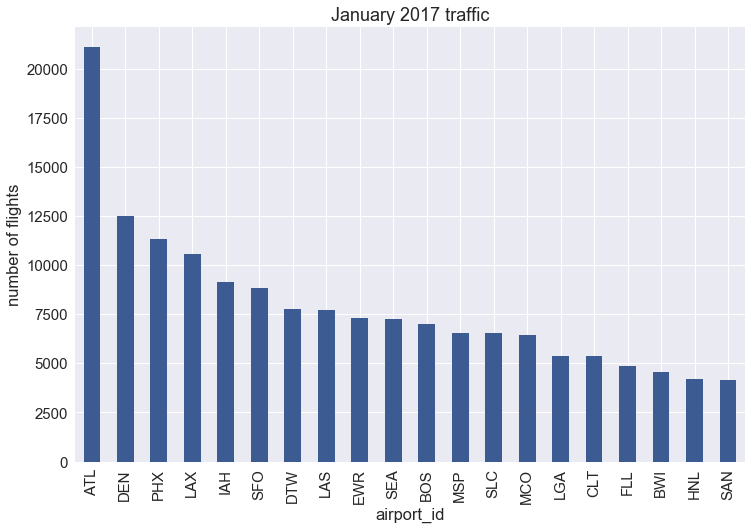

In [14]:
with sns.plotting_context("notebook",font_scale=1.5):
    fig,ax = plt.subplots(figsize=(12,8))
    density_month.head(20).plot.bar(ax=ax,color=sns.xkcd_rgb["denim blue"])
    ax.set_ylabel("number of flights")
    ax.set_title("January 2017 traffic")

### Average delay per airport 